# Tensorflow Classification

## Libraries

In [35]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

## Data
**PIMA INDIANS DIABETES DATASET:**


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target binary variable, Class (1 = has diabetes, 0 = doesn't have diabetes). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



In [8]:
df = pd.read_csv('./data/pima-indians-diabetes.csv')
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


## Normalization

In [14]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [18]:
# Let's do the normalization directly with pandas using a lmbda expression
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [19]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [20]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [22]:
# Alternative, hash_bucket_size is just an estimation of the mac number of categories we expect
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

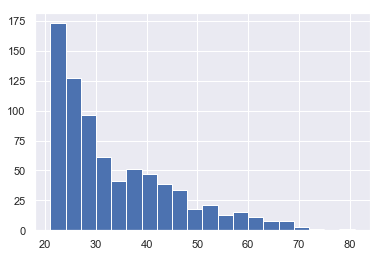

In [28]:
df['Age'].hist(bins=20)

In [30]:
# Create age buckets (continuous column to categorical)
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [31]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age_bucket]

## Train-Test Split

In [32]:
x_data = df.drop('Class', axis = 1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [34]:
labels = df['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)
print('X Train: ' + str(x_train.shape))
print('X Test: ' + str(x_test.shape))

X Train: (537, 9)
X Test: (231, 9)


## Input Functions

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

## Linear Classifier Model

In [39]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpitwrd8g3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x129df6828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [43]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpitwrd8g3/model.ckpt-0
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpitwrd8g3/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 325.576
INFO:tensorflow:loss = 7.3322086, step = 101 (0.308 sec)
INFO:tensorflow:global_step/sec: 539.977
INFO:tensorflow:loss = 4.079856, step = 201 (0.187 sec)
INFO:tensorflow:global_step/sec: 538.297
INFO:tensorflow:loss = 5.3274164, step = 301 (0.184 sec)
INFO:tensorflow:global_step/sec: 584

In [44]:
# Evaluation
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-05T18:39:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpitwrd8g3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-05-18:39:05
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.802963, auc_precision_recall = 0.6551062, average_loss = 0.52283126, global_step = 1000, label/mean = 0.35064936, loss = 5.032251, precision = 0.63380283, prediction/mean = 0.36774945, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpitwrd8g3/model.ckpt-1000


In [45]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.802963,
 'auc_precision_recall': 0.6551062,
 'average_loss': 0.52283126,
 'label/mean': 0.35064936,
 'loss': 5.032251,
 'precision': 0.63380283,
 'prediction/mean': 0.36774945,
 'recall': 0.5555556,
 'global_step': 1000}

## Predictions

In [46]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, batch_size=10, num_epochs=1, shuffle=False)

In [47]:
predictions = model.predict(pred_input_func)
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpitwrd8g3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.07262349], dtype=float32),
  'logistic': array([0.5181479], dtype=float32),
  'probabilities': array([0.48185208, 0.5181479 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.53546584], dtype=float32),
  'logistic': array([0.63075703], dtype=float32),
  'probabilities': array([0.36924297, 0.63075703], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.41555387], dtype=float32),
  'logistic': array([0.39758116], dtype=float32),
  'probabilities': array([0.60241884, 0.39758116], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.81153363], dtype=float32),
  'logistic': array([0.3075638], dtype=float32),
  'probabilities': array([0.6924362 , 0.30756378], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8613349], dtype=float32),
  'logistic'

# DNN Model
Now we will try to use a Deep Neural Network Estimator instead of the linear classifier. The main difference is that the DNN model can also be nonlinear. We will create a Dense NN, with 3 layers, each one with 10 neurons.

In [50]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col,
             age_bucket]

In [52]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpub9fzw9e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12c55bf60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being d

In [53]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
dnn_results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-05T19:09:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpub9fzw9e/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-05-19:09:28
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.84074074, auc_precision_recall = 0.7094377, average_loss = 0.47507238, global_step = 1000, label/mean = 0.35064936, loss = 4.5725718, precision = 0.6145833, prediction/mean = 0.39929995, recall = 0.72839504
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmpub9fzw9e/model.ckpt-1000


In [54]:
dnn_results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.84074074,
 'auc_precision_recall': 0.7094377,
 'average_loss': 0.47507238,
 'label/mean': 0.35064936,
 'loss': 4.5725718,
 'precision': 0.6145833,
 'prediction/mean': 0.39929995,
 'recall': 0.72839504,
 'global_step': 1000}

As we can see our DNN is performing more or less in the same way as the Linear Classifier